In [61]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

## Open MNIST data and create a subset with desired digits
MNIST dataset contains 70,000 images of hand-written digits from 0 to 9. Each image has a grey-scale resolution of 28 $\times$ 28 (i.e., 784 pixels). Each pixel has an integer value ranging from 0 (bright) to 255 (dark).

<font color=red>Change the code below to select a different subset </font>

In [62]:
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

# Change the conditions below to compare between other two digits.
class1Indices = (y==0)
class2Indices = (y==1)

x1 = X[class1Indices]
x2 = X[class2Indices]

Xtrain = np.concatenate((x1,x2),axis=0)
ytrain = np.concatenate((np.zeros(x1.shape[0]),np.ones(x2.shape[0])),axis=0)

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)



# Split the data to training, testing, and validation subsets

In [63]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2

Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]


# Accuracy of a classifier

In [64]:
def testLinearClassifier(a,X,y):
    # YOUR CODE HERE (2.)
    predictions = (X @ a[:-1] + a[-1]) > 0
    misclassifications = np.sum(predictions != y)
    print(f"Mis-classifications = {misclassifications} out of {y.size} equivalent to {misclassifications/(y.size) * 100} %")
    return misclassifications

## Define and test gaussianClassifierWithIdentityCovariance 

Mis-classifications = 64 out of 8897 equivalent to 0.7193435989659436 %
Mis-classifications = 9 out of 1449 equivalent to 0.6211180124223602 %
Mis-classifications = 36 out of 4434 equivalent to 0.8119079837618403 %


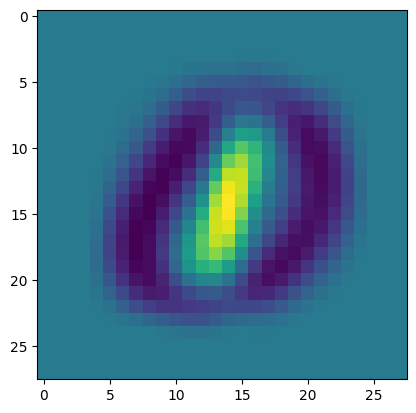

In [69]:
#------TRAINING CODE --------------
def gaussianClassifierWithIdentityCovariance(Xtrain,ytrain):
    # YOUR CODE HERE (3.)
    X1 = Xtrain[ytrain == 0]
    X2 = Xtrain[ytrain == 1]
    # means
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    # priors
    p1 = X1.shape[0] / Xtrain.shape[0]
    p2 = X2.shape[0] / Xtrain.shape[0]
    w = mu2 - mu1
    w0 = -0.5 * (np.dot(mu2, mu2) - np.dot(mu1, mu1)) + np.log(p2 / p1)
    a = np.hstack((w, w0))
    return a

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithIdentityCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

# testing to verify results
# from sklearn.naive_bayes import GaussianNB
# gnb = GaussianNB()
# gnb.fit(X_train, y_train)
# train_predictions = gnb.predict(X_train)
# val_predictions = gnb.predict(X_val)
# test_predictions = gnb.predict(X_test)
# train_misclassifications = np.sum(train_predictions != y_train)
# val_misclassifications = np.sum(val_predictions != y_val)
# test_misclassifications = np.sum(test_predictions != y_test)
# print(train_misclassifications)
# print(val_misclassifications)
# print(test_misclassifications)

## Define and test gaussianClassifierWithCommonCovariance 

Mis-classifications = 43 out of 8897 equivalent to 0.48330898055524335 %
Mis-classifications = 10 out of 1449 equivalent to 0.6901311249137336 %
Mis-classifications = 26 out of 4434 equivalent to 0.5863779882724403 %


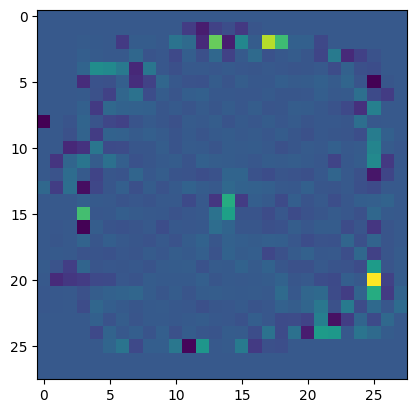

In [ ]:
#------TRAINING CODE --------------
def gaussianClassifierWithCommonCovariance(Xtrain,ytrain):
    # YOUR CODE HERE (4.)
    X1 = Xtrain[ytrain == 0]
    X2 = Xtrain[ytrain == 1]
    # means
    mu1 = np.mean(X1, axis=0)
    mu2 = np.mean(X2, axis=0)
    # priors
    p1 = X1.shape[0] / Xtrain.shape[0]
    p2 = X2.shape[0] / Xtrain.shape[0]

    cov1 = np.cov(X1, rowvar=False)
    cov2 = np.cov(X2, rowvar=False)
    sigma = (p1 * cov1 + p2 * cov2)
    sigma += np.eye(sigma.shape[0]) * 1 # add regularization term ?
    
    sigma_inv = np.linalg.inv(sigma)

    w = np.dot(sigma_inv, mu2 - mu1)
    w0 = (-0.5 * (np.dot(mu2, np.dot(sigma_inv, mu2)) - np.dot(mu1, np.dot(sigma_inv, mu1))) + np.log(p2 / p1))
    a = np.hstack((w, w0))
    return a
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = gaussianClassifierWithCommonCovariance(X_train,y_train)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


## Define and test logisticRegression 

You may choose the step size as 1e-4. You can try changing it.

Use the expit() function from scipy.special.expit to implement sigmoid without overflow errors 

Mis-classifications = 2 out of 8897 equivalent to 0.022479487467685737 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 5 out of 4434 equivalent to 0.11276499774470004 %


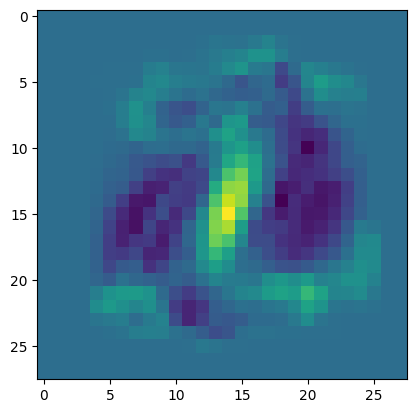

In [101]:
def logisticRegression(Xtrain,ytrain,iterations=100,step_size=1e-4,verbose=False):
    # YOUR CODE HERE (5.)
    X_bias = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))
    # a = 0.01 * np.random.randn(X_bias.shape[1]) # initialize weights randomly (?)
    a = np.zeros(Xtrain.shape[1] + 1)
    
    for i in range(iterations):
        z = np.dot(X_bias, a)
        predictions = expit(z)

        gradient = np.dot(X_bias.T, (predictions - ytrain)) / ytrain.size
        a -= step_size * gradient

        if verbose and i % (iterations // 10) == 0:
            loss = -np.mean(ytrain * np.log(predictions + 1e-8) + (1 - ytrain) * np.log(1 - predictions + 1e-8))
            print(f"Iteration {i}: Loss = {loss:.6f}")
    
    return a
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegression(X_train,y_train,iterations=500,verbose=False)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)


Mis-classifications = 2 out of 8897 equivalent to 0.022479487467685737 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 5 out of 4434 equivalent to 0.11276499774470004 %


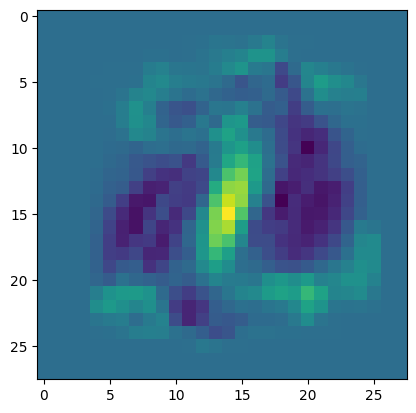

In [ ]:
def logisticRegressionWithRegularization(Xtrain,ytrain,iterations=100,step_size=1e-4,lam=1,verbose=False):
    # YOUR CODE HERE (6.)
    X_bias = np.hstack((Xtrain, np.ones((Xtrain.shape[0], 1))))

    a = np.zeros(Xtrain.shape[1] + 1)

    for i in range(iterations):
        z = np.dot(X_bias, a)
        predictions = expit(z)
        gradient = np.dot(X_bias.T, (predictions - ytrain)) / ytrain.size
        regularization = lam * a
        regularization[-1] = 0
        a -= step_size * (gradient + regularization)

        if verbose and i % (iterations // 10) == 0:
            # Compute regularized loss (logistic cost + L2 regularization)
            loss = (-np.mean(ytrain * np.log(predictions + 1e-8) + (1 - ytrain) * np.log(1 - predictions + 1e-8)) +
                    (lam / (2 * ytrain.size)) * np.sum(a[:-1] ** 2))
            print(f"Iteration {i}: Loss = {loss:.6f}")

    return a
    
#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
a = logisticRegressionWithRegularization(X_train,y_train,iterations=500,verbose=False,lam=0.1)
plt.imshow(np.reshape(a[0:784],(28,28)))

train = testLinearClassifier(a,X_train,y_train)
val = testLinearClassifier(a,X_val,y_val)
test = testLinearClassifier(a,X_test,y_test)

In [ ]:
def optimizeHyperparameters(Xtrain,ytrain, Xval, yval, Xtest, ytest, lambdas, iterations=500, step_size=1e-4):
    # YOUR CODE HERE (7.)
    lamopt = None
    lowest_misclassifications = float('inf')

    for lam in lambdas:
        a = logisticRegressionWithRegularization(Xtrain, ytrain, iterations=iterations, step_size=step_size, lam=lam)
        misclassifications = testLinearClassifier(a,Xval,yval)
        if misclassifications < lowest_misclassifications:
            lowest_misclassifications = misclassifications
            lamopt = lam

    a4 = logisticRegressionWithRegularization(Xtrain, ytrain, iterations=iterations, step_size=step_size, lam=lamopt)

    # Evaluate on the test dataset
    Xtest_bias = np.hstack((Xtest, np.ones((Xtest.shape[0], 1))))
    test_predictions = (expit(np.dot(Xtest_bias, a4)) >= 0.5).astype(int)
    test_accuracy = np.mean(test_predictions == ytest)

    return lamopt, a4, (test_accuracy * 100)  

lambdas = [0.01, 0.1, 1, 10, 100]
# lambdas = [100, 10, 1, 0.1, 0.01]
lamopt, a4, test_accuracy = optimizeHyperparameters(X_train, y_train, X_val, y_val, X_test, y_test, lambdas)
print("Optimal λ:", lamopt)
print("Test Accurary:", test_accuracy)

Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 0 out of 1449 equivalent to 0.0 %
Optimal λ: 100
Test Accurary: 99.86468200270636


# REPORT TEST ERRORS OF THE BEST MODELS

YOUR CODE BELOW

In [10]:
def compareClassifiers(Xtrain, ytrain, Xval, yval, Xtest, ytest, lambdas, iterations=500, step_size=1e-4):
    a1 = gaussianClassifierWithIdentityCovariance(Xtrain, ytrain)
    misclassifications_a1 = testLinearClassifier(a1, Xtest, ytest)

    a2 = gaussianClassifierWithCommonCovariance(Xtrain, ytrain)
    misclassifications_a2 = testLinearClassifier(a2, Xtest, ytest)

    a3 = logisticRegression(Xtrain, ytrain, iterations=iterations, step_size=step_size)
    misclassifications_a3 = testLinearClassifier(a3, Xtest, ytest)

    lamopt, a4, test_accuracy = optimizeHyperparameters(Xtrain, ytrain, Xval, yval, Xtest, ytest, lambdas, iterations=iterations, step_size=step_size)
    misclassifications_a4 = testLinearClassifier(a4, Xtest, ytest)

    # results
    print("\nPerformance Summary:")
    print(f"Gaussian Classifier (Identity Covariance, a1): {misclassifications_a1} misclassifications")
    print(f"Gaussian Classifier (Common Covariance, a2): {misclassifications_a2} misclassifications")
    print(f"Logistic Regression (a3): {misclassifications_a3} misclassifications")
    print(f"Regularized Logistic Regression (a4, λ={lamopt}): {misclassifications_a4} misclassifications")
    
    return {
        "a1_misclassifications": misclassifications_a1,
        "a2_misclassifications": misclassifications_a2,
        "a3_misclassifications": misclassifications_a3,
        "a4_misclassifications": misclassifications_a4,
        "a4_lambda_optimal": lamopt,
        "a4_test_accuracy": test_accuracy,
    }


lambdas = [0.01, 0.1, 1, 10, 100]
results = compareClassifiers(X_train, y_train, X_val, y_val, X_test, y_test, lambdas)
print(results)

Mis-classifications = 36 out of 4434 equivalent to 0.8119079837618403 %
Mis-classifications = 29 out of 4434 equivalent to 0.6540369869192603 %
Mis-classifications = 5 out of 4434 equivalent to 0.11276499774470004 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 1 out of 1449 equivalent to 0.06901311249137336 %
Mis-classifications = 0 out of 1449 equivalent to 0.0 %
Mis-classifications = 6 out of 4434 equivalent to 0.13531799729364005 %

Performance Summary:
Gaussian Classifier (Identity Covariance, a1): 36 misclassifications
Gaussian Classifier (Common Covariance, a2): 29 misclassifications
Logistic Regression (a3): 5 misclassifications
Regularized Logistic Regression (a4, λ=100): 6 misclassifications
{'a1_misclassifications': 36, 'a2_misclassifications': 29, 'a3_misclassifications': 5, 'a4_miscla

# Component 2

1. Load the MNIST dataset. Split this dataset into training (70%), validation (10%), and test dataset
(20%).

In [47]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import fetch_openml
import pickle
from scipy.special import expit
from sklearn.model_selection import train_test_split

X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
y = np.asarray([int(numeric_string) for numeric_string in y])

Xtrain = X
ytrain = y

# Saving the temporary variables for fast retrieval
with open('temp.pickle', 'wb') as handle:
    pickle.dump([Xtrain, ytrain], handle)

In [48]:
# loading the temporary variables for fast retrieval
with open('temp.pickle', 'rb') as handle:
    Xtrain, ytrain = pickle.load(handle)
    
# Split the data to training, testing, and validation subsets
X_train, X_test, y_train, y_test = train_test_split(Xtrain, ytrain, test_size=0.3, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.14, random_state=1) # 0.25 x 0.8 = 0.2

Nsamples = X_train.shape[0]
Nfeatures = X_train.shape[1]

2. Develop a python function called gaussianMultiChannelClassifier

Matrix A2 shape: (785, 10)


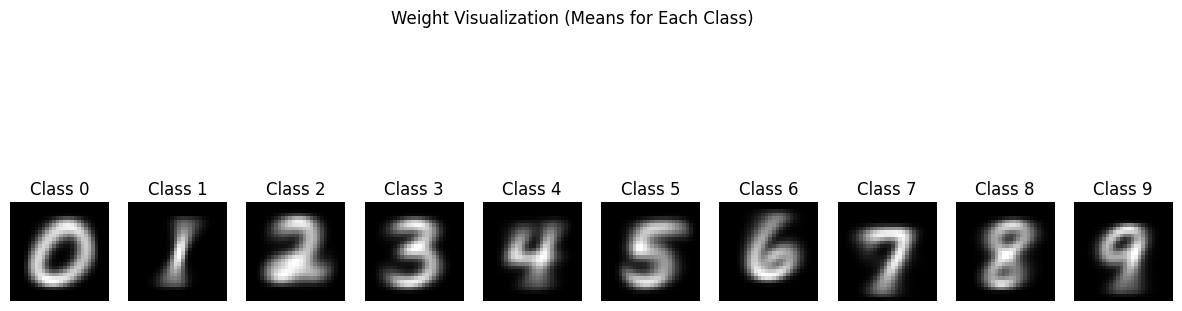

In [ ]:
#------TRAINING CODE --------------
def gaussianMultiChannelClassifier(Xtrain,ytrain):
    
    n_classes = len(np.unique(ytrain))
    n_features = Xtrain.shape[1]
    A1 = np.zeros((n_features + 1, n_classes))  # +1 for the bias term

    for i in range(n_classes):
        X_i = Xtrain[ytrain == i]
        mu_i = np.mean(X_i, axis=0)
        prior_i = X_i.shape[0] / Xtrain.shape[0]
        w = mu_i  # Σ = I implies w = μ_i
        w0 = -0.5 * np.dot(mu_i, mu_i) + np.log(prior_i)

        A1[:-1, i] = w
        A1[-1, i] = w0

    return A1

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
A1 = gaussianMultiChannelClassifier(X_train, y_train)
print("Matrix A2 shape:", A1.shape)
fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    weights = A1[:-1, i]
    image = np.reshape(weights, (28, 28))
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Class {i}")
    axes[i].axis('off')

plt.suptitle("Weight Visualization (gaussianMultiChannelClassifier)")
plt.show()


3. Develop a python function called logisticRegressionMultiClassClassifier

Matrix A2 shape: (785, 10)


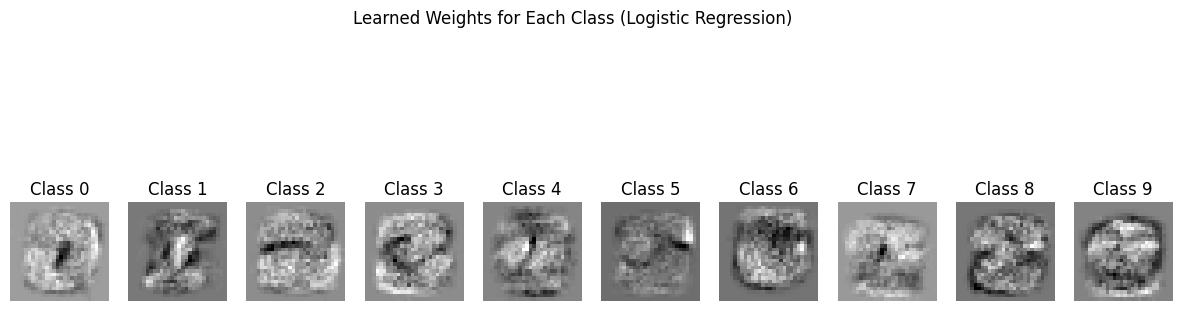

In [ ]:
#------TRAINING CODE --------------
def logisticRegressionMultiClassClassifier(Xtrain, ytrain, iterations=1000, step_size=1e-3):
    n_samples, n_features = Xtrain.shape
    n_classes = len(np.unique(ytrain))
    X_bias = np.hstack((Xtrain, np.ones((n_samples, 1))))
    # One-hot encode the labels
    Y_onehot = np.zeros((n_samples, n_classes))
    Y_onehot[np.arange(n_samples), ytrain.astype(int)] = 1
    
    A2 = np.zeros((n_features + 1, n_classes))
    # Gradient descent
    for _ in range(iterations):
        scores = np.dot(X_bias, A2)
        
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
        probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        gradient = np.dot(X_bias.T, (probabilities - Y_onehot)) / n_samples
        A2 -= step_size * gradient

    return A2

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
A2 = logisticRegressionMultiClassClassifier(X_train, y_train)
print("Matrix A2 shape:", A2.shape)

fig, axes = plt.subplots(1, 10, figsize=(15, 5))
for i in range(10):
    weights = A2[:-1, i]
    image = np.reshape(weights, (28, 28))
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Class {i}")
    axes[i].axis('off')

plt.suptitle("Learned Weights for Each Class (Logistic Regression)")
plt.show()

4. Develop a python function called logisticRegressionMultiClassClassifierWithRegularization

Matrix A3 shape: (785, 10)


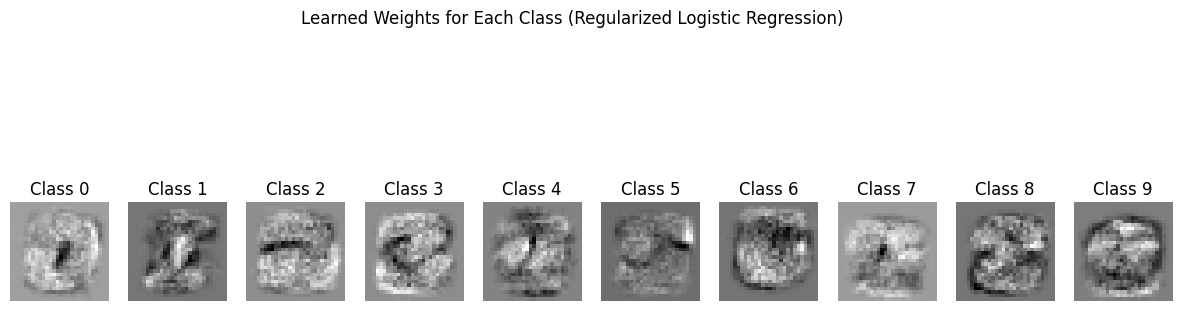

In [51]:
#------TRAINING CODE --------------
def logisticRegressionMultiClassClassifierWithRegularization(Xtrain, ytrain, lam = 0.1, iterations=1000, step_size=1e-3):
    n_samples, n_features = Xtrain.shape
    n_classes = len(np.unique(ytrain))
    
    # Add a bias term to the feature matrix
    X_bias = np.hstack((Xtrain, np.ones((n_samples, 1))))
    
    # One-hot encode the labels
    Y_onehot = np.zeros((n_samples, n_classes))
    Y_onehot[np.arange(n_samples), ytrain.astype(int)] = 1
    
    # Initialize weights randomly for all classes
    A3 = np.zeros((n_features + 1, n_classes))
    
    # Gradient descent
    for _ in range(iterations):
        # Compute the scores for all classes
        scores = np.dot(X_bias, A3)  # Shape: [n_samples, n_classes]
        
        # Apply the softmax function
        exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))  # Stability trick
        probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
        
        # Compute the gradient
        gradient = np.dot(X_bias.T, (probabilities - Y_onehot)) / n_samples
        
        # Add regularization (excluding the bias term)
        gradient[:-1] += lam * A3[:-1]  # Regularize only weights, not bias
        
        # Update the weights
        A3 -= step_size * gradient

    return A3

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
A3 = logisticRegressionMultiClassClassifierWithRegularization(X_train, y_train, lam=0.1)
print("Matrix A3 shape:", A3.shape)  # Should be (n_features + 1, n_classes)

fig, axes = plt.subplots(1, 10, figsize=(15, 5))  # Assuming 10 classes (digits 0–9)
for i in range(10):
    weights = A3[:-1, i]  # Exclude the bias term
    image = np.reshape(weights, (28, 28))  # Reshape to 28x28 for MNIST
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(f"Class {i}")
    axes[i].axis('off')

plt.suptitle("Learned Weights for Each Class (Regularized Logistic Regression)")
plt.show()


5. Write a function Optimize_MC_Hyperparameters to determine the optimal λ of logisticRegressionMultiClassClassifierWithRegularization.

In [52]:
#------TRAINING CODE --------------
def Optimize_MC_Hyperparameters(Xtrain, ytrain, Xval, yval, lambdas, iterations=1000, step_size=1e-3):

    best_lambda = None
    lowest_misclassifications = float('inf')

    for lam in lambdas:
        # Train the model with the current λ
        A3 = logisticRegressionMultiClassClassifierWithRegularization(
            Xtrain, ytrain, lam=lam, iterations=iterations, step_size=step_size
        )
        
        # Evaluate on the validation dataset
        Xval_bias = np.hstack((Xval, np.ones((Xval.shape[0], 1))))  # Add bias term
        scores = np.dot(Xval_bias, A3)  # Compute scores for each class
        predictions = np.argmax(scores, axis=1)  # Predict the class with the highest score
        misclassifications = np.sum(predictions != yval)  # Count misclassifications
        
        # Update the best λ if the current one is better
        if misclassifications < lowest_misclassifications:
            lowest_misclassifications = misclassifications
            best_lambda = lam

    # Train the model on the full training set using the optimal λ
    A4 = logisticRegressionMultiClassClassifierWithRegularization(
        Xtrain, ytrain, lam=best_lambda, iterations=iterations, step_size=step_size
    )
    
    print(f"Best Lambda: {best_lambda}")
    return A4

#------SIMPLE TESTING ON THE TRAINING DATA ITSELF --------------
lambdas = [0.01, 0.1, 1, 10, 100]
A4 = Optimize_MC_Hyperparameters(X_train, y_train, X_val, y_val, lambdas)
print("Matrix A4 shape:", A4.shape)

Best Lambda: 0.1
Matrix A4 shape: (785, 10)


6. Write a function testLinearMCClassifier to test the performance of a multiclass classifier specified by its weights A.

In [57]:
def testLinearMCClassifier(A, X, y):
    Xtest_bias = np.hstack((X, np.ones((X.shape[0], 1))))
    scores = np.dot(Xtest_bias, A)
    predictions = np.argmax(scores, axis=1)
    misclassifications = np.sum(predictions != y)
    print(f"Mis-classifications = {misclassifications} out of {y.size} equivalent to {misclassifications/(y.size) * 100} %")
    return misclassifications



7. Write a script that would compare the performance all the above algorithms on the test subset.

In [59]:
# Each prints results out by training, validation, and then test data
# A1
print("A1")
testLinearMCClassifier(A1, X_train, y_train)
testLinearMCClassifier(A1, X_val, y_val)
testLinearMCClassifier(A1, X_test, y_test)
# A2
print("A2")
testLinearMCClassifier(A2, X_train, y_train)
testLinearMCClassifier(A2, X_val, y_val)
testLinearMCClassifier(A2, X_test, y_test)
# A3
print("A3")
testLinearMCClassifier(A3, X_train, y_train)
testLinearMCClassifier(A3, X_val, y_val)
testLinearMCClassifier(A3, X_test,y_test)
# A4
print("A4")
testLinearMCClassifier(A4, X_train, y_train)
testLinearMCClassifier(A4, X_val, y_val)
testLinearMCClassifier(A4, X_test, y_test)

A1
Mis-classifications = 7986 out of 42139 equivalent to 18.95156505849688 %
Mis-classifications = 1304 out of 6861 equivalent to 19.005975805276197 %
Mis-classifications = 3975 out of 21000 equivalent to 18.928571428571427 %
A2
Mis-classifications = 3616 out of 42139 equivalent to 8.581124374095255 %
Mis-classifications = 708 out of 6861 equivalent to 10.319195452557937 %
Mis-classifications = 2083 out of 21000 equivalent to 9.91904761904762 %
A3
Mis-classifications = 3147 out of 42139 equivalent to 7.468141151902039 %
Mis-classifications = 630 out of 6861 equivalent to 9.182334936598163 %
Mis-classifications = 1840 out of 21000 equivalent to 8.761904761904763 %
A4
Mis-classifications = 3147 out of 42139 equivalent to 7.468141151902039 %
Mis-classifications = 630 out of 6861 equivalent to 9.182334936598163 %
Mis-classifications = 1840 out of 21000 equivalent to 8.761904761904763 %


1840